In [ ]:
from google.colab import drive
drive.mount('/content/drive')
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import Input, Average
model_1 = load_model('/content/drive/MyDrive/VM Mosquito/model-02-0.6133.hdf5')
model_1 = Model(inputs=model_1.inputs,
                outputs=model_1.outputs,
                name='name_of_model_1')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
model_2 = load_model('/content/drive/MyDrive/VM Mosquito/model2-05-0.5667.hdf5')
model_2 = Model(inputs=model_2.inputs,
                outputs=model_2.outputs,
                name='name_of_model_2')

In [ ]:
model_3 = load_model('/content/drive/MyDrive/VM Mosquito/resnetmosquito-04-0.8000.hdf5')
model_3 = Model(inputs=model_3.inputs,
                outputs=model_3.outputs,
                name='name_of_model_3')

In [ ]:
models = [model_1, model_2 ,model_3]
model_input = Input(shape=(299, 299, 3))
model_outputs = [model(model_input) for model in models]
ensemble_output = Average()(model_outputs)
ensemble_model = Model(inputs=model_input, outputs=ensemble_output, name='ensemble')

In [ ]:
import tensorflow as tf

In [ ]:
base_learning_rate = 0.001
ensemble_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=base_learning_rate),
                           loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                           metrics=['accuracy'])


In [ ]:
# Commented out IPython magic to ensure Python compatibility.
import numpy as np
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
# %matplotlib inline
import cv2
import os
from tensorflow import keras
import glob as gb
import pandas as pd
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.layers.experimental.preprocessing import RandomFlip, RandomRotation
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPool2D ,LeakyReLU

In [ ]:
IMG_SIZE = (299, 299)  # resolution
directory = "/content/drive/MyDrive/VM Mosquito/TrainVal"
BATCH_SIZE = 128

In [ ]:
# Training dataset
train_dataset = image_dataset_from_directory(directory,
                                             shuffle=True,
                                             labels='inferred',
                                             batch_size=BATCH_SIZE,
                                             image_size=IMG_SIZE,
                                             validation_split=0.1,
                                             subset='training',
                                             color_mode='rgb',
                                             seed=42)

# Validation dataset
validation_dataset = image_dataset_from_directory(directory,
                                                  shuffle=True,
                                                  labels='inferred',
                                                  batch_size=BATCH_SIZE,
                                                  image_size=IMG_SIZE,
                                                  validation_split=0.1,
                                                  subset='validation',
                                                  color_mode='rgb',
                                                  seed=42)

Found 2990 files belonging to 6 classes.
Using 2691 files for training.
Found 2990 files belonging to 6 classes.
Using 299 files for validation.


<ipython-input-57-009b3ca2d096>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=[ "Aedes albopictus", "Aedes vexans", "Anopheles sinensis","Culex pipiens","Culex tritaeniorhynchus","Non vectors"], y=Data_imbalance, palette="rocket")


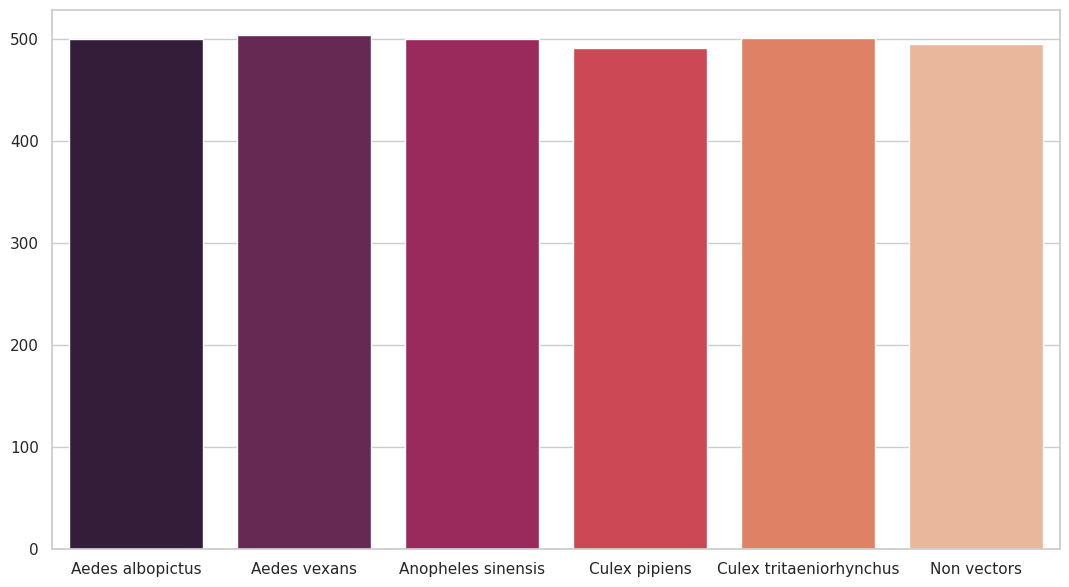

In [ ]:
sns.set_theme(style="whitegrid")
Data_imbalance = []
for folder in os.listdir(directory):
    files = gb.glob(pathname=str(directory + "/" + folder +"/*.*"))
    Data_imbalance.append(len(files))
plt.figure(figsize=(13,7))
sns.barplot(x=[ "Aedes albopictus", "Aedes vexans", "Anopheles sinensis","Culex pipiens","Culex tritaeniorhynchus","Non vectors"], y=Data_imbalance, palette="rocket")
plt.show()

In [ ]:
total = 0
for i in range(0,len(Data_imbalance)) :
    total +=Data_imbalance[i]

weight_for_0 = (1 / Data_imbalance[0]) * (total / 6.0)
weight_for_1 = (1 / Data_imbalance[1]) * (total / 6.0)
weight_for_2 = (1 / Data_imbalance[2]) * (total / 6.0)
weight_for_3 = (1 / Data_imbalance[3]) * (total / 6.0)
weight_for_4 = (1 / Data_imbalance[3]) * (total / 6.0)
weight_for_5 = (1 / Data_imbalance[3]) * (total / 6.0)

class_weight = {0: weight_for_0, 1: weight_for_1, 2: weight_for_2, 3: weight_for_3,4: weight_for_4,5: weight_for_5}

print('Weight for class 0: {:.2f}'.format(weight_for_0))
print('Weight for class 1: {:.2f}'.format(weight_for_1))
print('Weight for class 2: {:.2f}'.format(weight_for_2))
print('Weight for class 3: {:.2f}'.format(weight_for_3))
print('Weight for class 4: {:.2f}'.format(weight_for_4))
print('Weight for class 5: {:.2f}'.format(weight_for_5))


Weight for class 0: 1.00
Weight for class 1: 0.99
Weight for class 2: 1.00
Weight for class 3: 1.01
Weight for class 4: 1.01
Weight for class 5: 1.01


In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint

In [ ]:
model_filepath="/content/drive/MyDrive/Colab Notebooks/emsemble-2-best-{epoch:02d}-{val_accuracy:.4f}.hdf5"
checkpoint = ModelCheckpoint(
    filepath = model_filepath ,
    monitor ='val_accuracy',
    mode = 'max' ,
    save_best_only =True ,
     verbose = 1

)

In [ ]:
history = ensemble_model.fit(train_dataset , verbose=2 , epochs=50 ,class_weight=class_weight,
                               validation_data=validation_dataset , use_multiprocessing= True )

Epoch 1/50
22/22 - 116s - loss: 1.6288 - accuracy: 0.3813 - val_loss: 1.0913 - val_accuracy: 0.6288 - 116s/epoch - 5s/step
Epoch 2/50
22/22 - 53s - loss: 0.9685 - accuracy: 0.6384 - val_loss: 0.8403 - val_accuracy: 0.6589 - 53s/epoch - 2s/step
Epoch 3/50
22/22 - 54s - loss: 0.8174 - accuracy: 0.7250 - val_loss: 0.7677 - val_accuracy: 0.7893 - 54s/epoch - 2s/step
Epoch 4/50
22/22 - 53s - loss: 0.7327 - accuracy: 0.7863 - val_loss: 0.7000 - val_accuracy: 0.8060 - 53s/epoch - 2s/step
Epoch 5/50
22/22 - 53s - loss: 0.6754 - accuracy: 0.8008 - val_loss: 0.6460 - val_accuracy: 0.8495 - 53s/epoch - 2s/step
Epoch 6/50
22/22 - 54s - loss: 0.6335 - accuracy: 0.8328 - val_loss: 0.6162 - val_accuracy: 0.8696 - 54s/epoch - 2s/step
Epoch 7/50
22/22 - 53s - loss: 0.6013 - accuracy: 0.8454 - val_loss: 0.5977 - val_accuracy: 0.8562 - 53s/epoch - 2s/step
Epoch 8/50
22/22 - 54s - loss: 0.5841 - accuracy: 0.8662 - val_loss: 0.5722 - val_accuracy: 0.8796 - 54s/epoch - 2s/step
Epoch 9/50
22/22 - 53s - loss:

In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
ensemble_model.evaluate(validation_dataset , verbose = 1)

3/3 [==============================] - 5s 1s/step - loss: 0.2607 - accuracy: 0.9833


[0.26068243384361267, 0.9832776188850403]

In [ ]:
class_names = train_dataset.class_names

In [ ]:
class_names

['Aedes albopictus',
 'Aedes vexans',
 'Anopheles sinensis',
 'Culex pipiens',
 'Culex tritaeniorhynchus',
 'Non vectors']

1/1 [==============================] - 0s 33ms/step


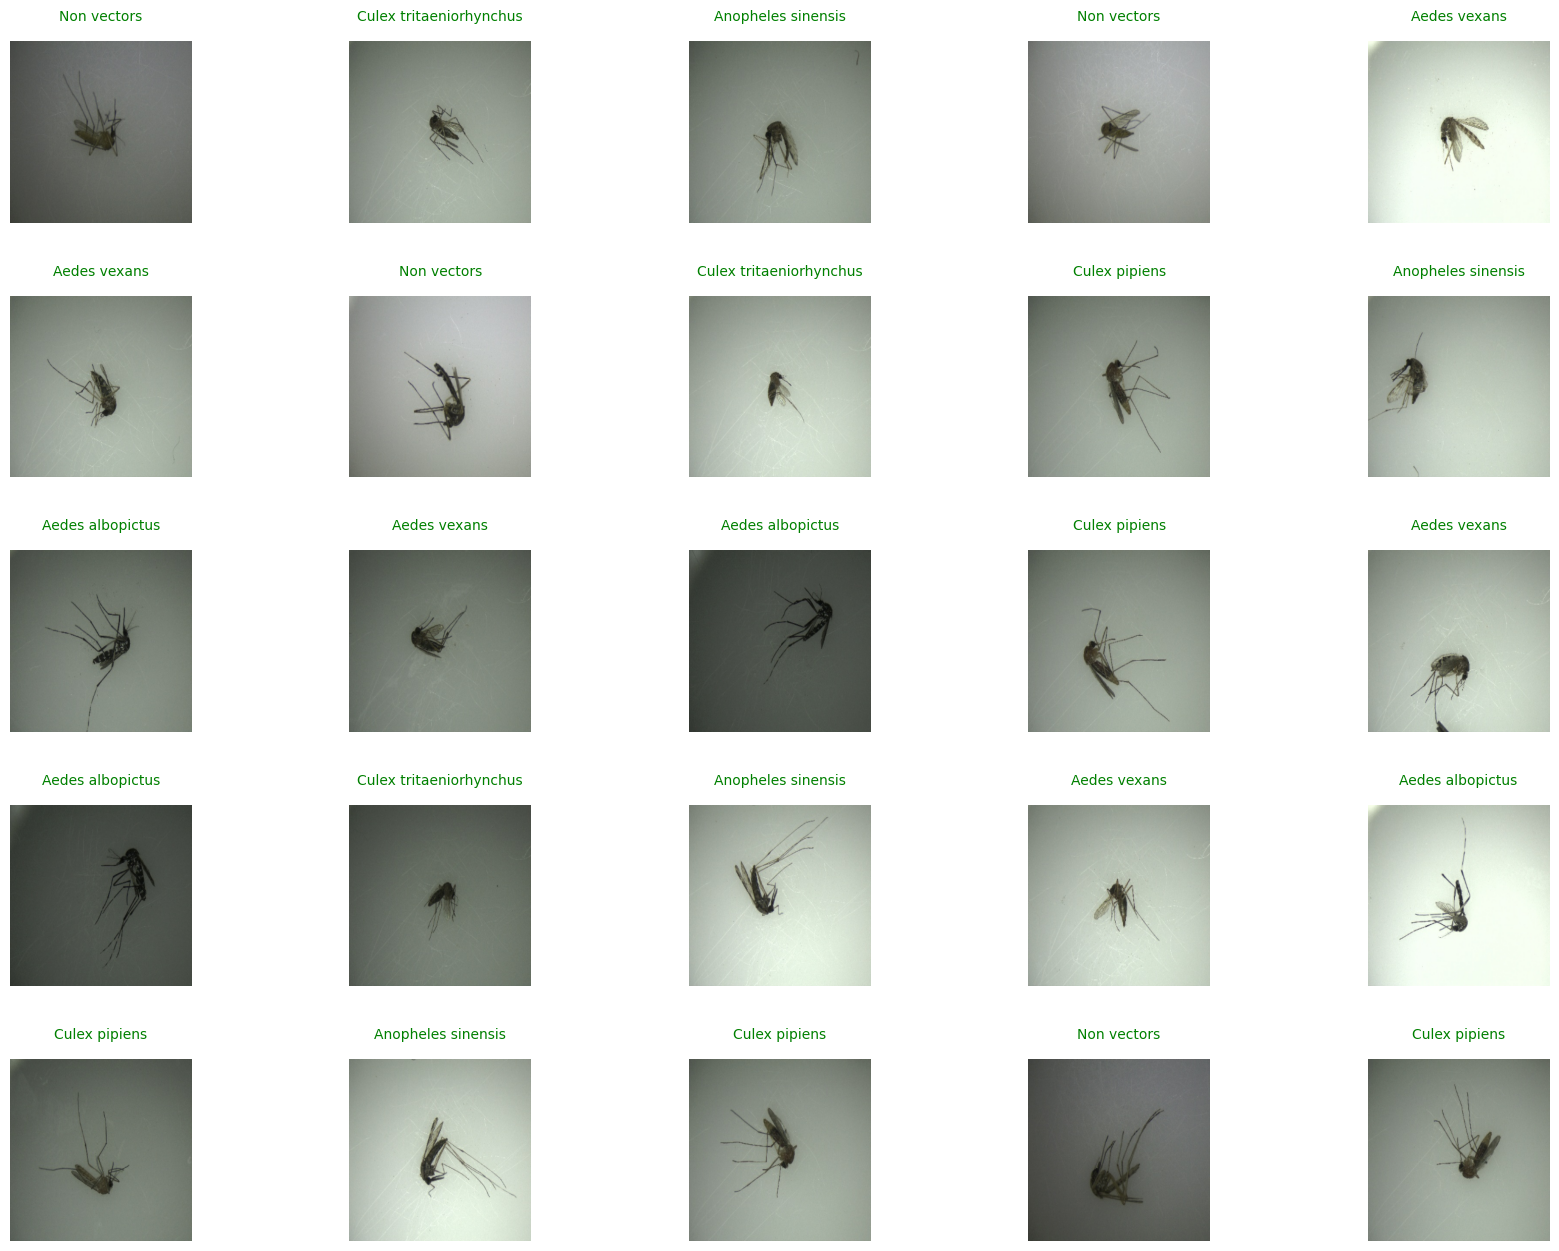

In [ ]:
plt.figure(figsize=(20, 15))
for images, labels in validation_dataset.take(1):
    for i in range(25):
        plt.subplot(5,5,i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.axis("off")
        im2 = images[i].numpy().astype("uint8")
        img2 = tf.expand_dims(im2, 0)
        predict = ensemble_model.predict(img2)
        predicted= class_names[np.argmax(predict)]
        actual = class_names[labels[i].numpy().astype("uint8")]
        if actual == predicted:
            plt.title(predicted, fontsize=10, color='green', pad=15)
        else:
            plt.title(actual, fontsize=10, color='velvet', pad=15)

plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.4)


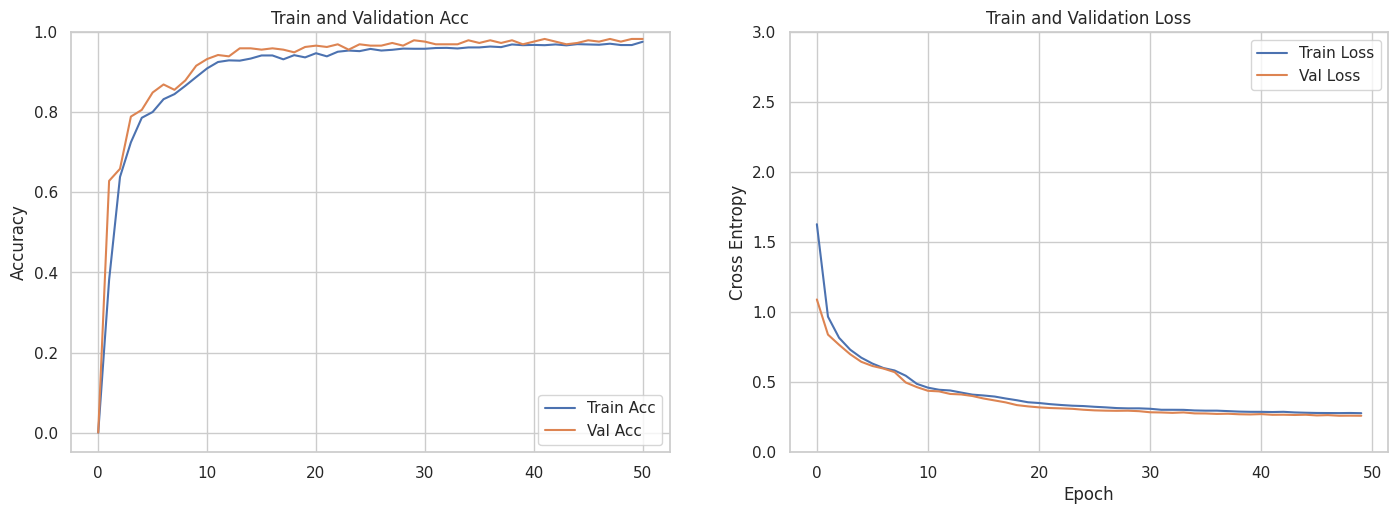

In [ ]:
import matplotlib.pyplot as plt

acc = [0.] + history.history['accuracy']
val_acc = [0.] + history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(17, 12))

plt.subplot(2, 2, 1)
plt.plot(acc, label='Train Acc')
plt.plot(val_acc, label='Val Acc')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()), 1])
plt.title('Train and Validation Acc')

plt.subplot(2, 2, 2)
plt.plot(loss, label='Train Loss')
plt.plot(val_loss, label='Val Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0, 3.0])
plt.title('Train and Validation Loss')
plt.xlabel('Epoch')

plt.show()


2/2 [==============================] - 8s 6s/step


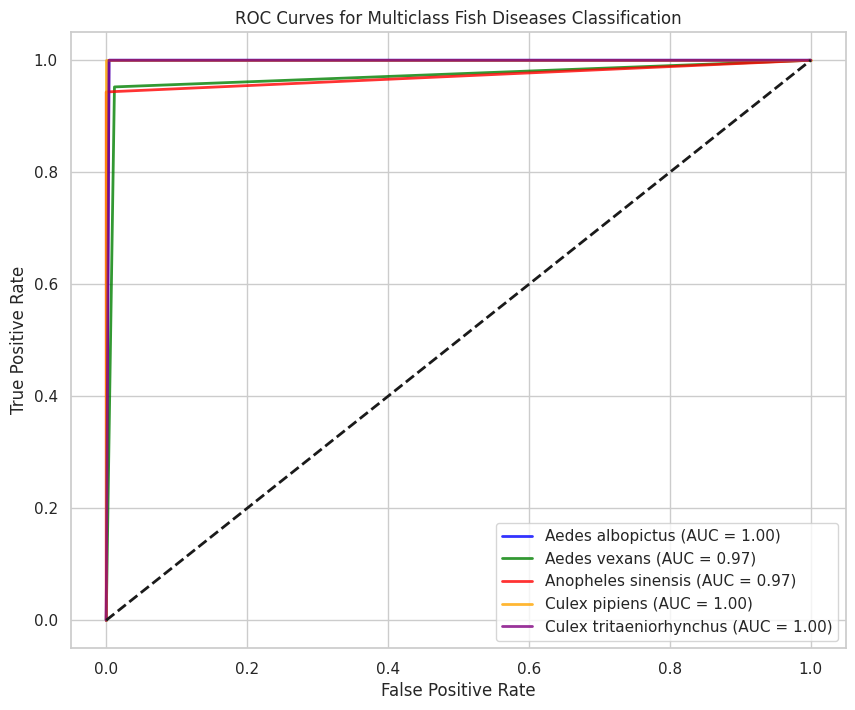

ROC AUC for Aedes albopictus: 0.9981
ROC AUC for Aedes vexans: 0.9704
ROC AUC for Anopheles sinensis: 0.9717
ROC AUC for Culex pipiens: 1.0000
ROC AUC for Culex tritaeniorhynchus: 0.9980
ROC AUC for Non vectors: 1.0000
                         precision    recall  f1-score   support

       Aedes albopictus       0.98      1.00      0.99        41
           Aedes vexans       0.93      0.95      0.94        42
     Anopheles sinensis       1.00      0.94      0.97        53
          Culex pipiens       1.00      1.00      1.00        60
Culex tritaeniorhynchus       0.98      1.00      0.99        48
            Non vectors       1.00      1.00      1.00        55

               accuracy                           0.98       299
              macro avg       0.98      0.98      0.98       299
           weighted avg       0.98      0.98      0.98       299



In [ ]:
import numpy as np
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize

# Initialize empty lists to store true labels and predicted labels
true_labels = []
predicted_labels = []

# Iterate through the validation dataset and make predictions
for images, labels in validation_dataset:
    predictions = ensemble_model.predict(images)
    predicted_labels.extend(np.argmax(predictions, axis=1))
    true_labels.extend(labels.numpy())

# Binarize the true and predicted labels
true_labels_bin = label_binarize(true_labels, classes=np.unique(true_labels))
predicted_labels_bin = label_binarize(predicted_labels, classes=np.unique(predicted_labels))

# Compute class-specific ROC AUC values
roc_auc_per_class = []
for i in range(len(class_names)):
    roc_auc = roc_auc_score(true_labels_bin[:, i], predicted_labels_bin[:, i])
    roc_auc_per_class.append(roc_auc)

# Generate the classification report
report = classification_report(true_labels, predicted_labels, target_names=class_names)

# Plot class-specific ROC curves with different colors and line styles
plt.figure(figsize=(10, 8))
colors = ['blue', 'green', 'red', 'orange', 'purple']  # Define colors here
for i, color in zip(range(len(class_names)), colors):
    fpr, tpr, _ = roc_curve(true_labels_bin[:, i], predicted_labels_bin[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(
        fpr, tpr, label=f'{class_names[i]} (AUC = {roc_auc:.2f})', color=color, linestyle='-',
        linewidth=2, alpha=0.8
    )

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Multiclass Fish Diseases Classification')
plt.legend(loc='lower right')
plt.grid(True)  # Add a grid for better readability
plt.show()

# Print class-specific ROC AUC values
for i in range(len(class_names)):
    print(f'ROC AUC for {class_names[i]}: {roc_auc_per_class[i]:.4f}')

# Print the classification report
print(report)


In [ ]:
from sklearn.metrics import cohen_kappa_score

kappa = cohen_kappa_score(true_labels, predicted_labels)
print(f'Cohen\'s Kappa: {kappa:.4f}')


Cohen's Kappa: 0.9799


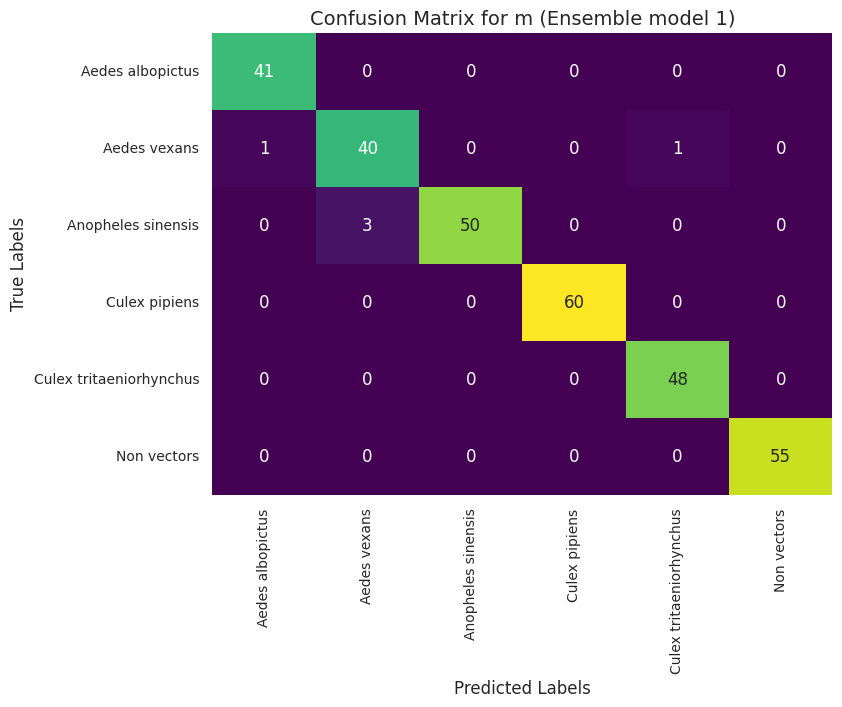

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Calculate confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)

# Plot confusion matrix with custom styling
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='viridis', xticklabels=class_names, yticklabels=class_names, cbar=False)
plt.xlabel('Predicted Labels', fontsize=12)
plt.ylabel('True Labels', fontsize=12)
plt.title('Confusion Matrix for m (Ensemble model 1)', fontsize=14)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()


In [ ]:
from sklearn.metrics import matthews_corrcoef
import numpy as np

# Assuming true_labels and predicted_labels are your multiclass labels
mcc_values = [matthews_corrcoef(true_labels == i, predicted_labels == i) for i in np.unique(true_labels)]
average_mcc = np.mean(mcc_values)

print(f'Average Matthews Correlation Coefficient for Multiclass: {average_mcc:.4f}')


Average Matthews Correlation Coefficient for Multiclass: 0.9785


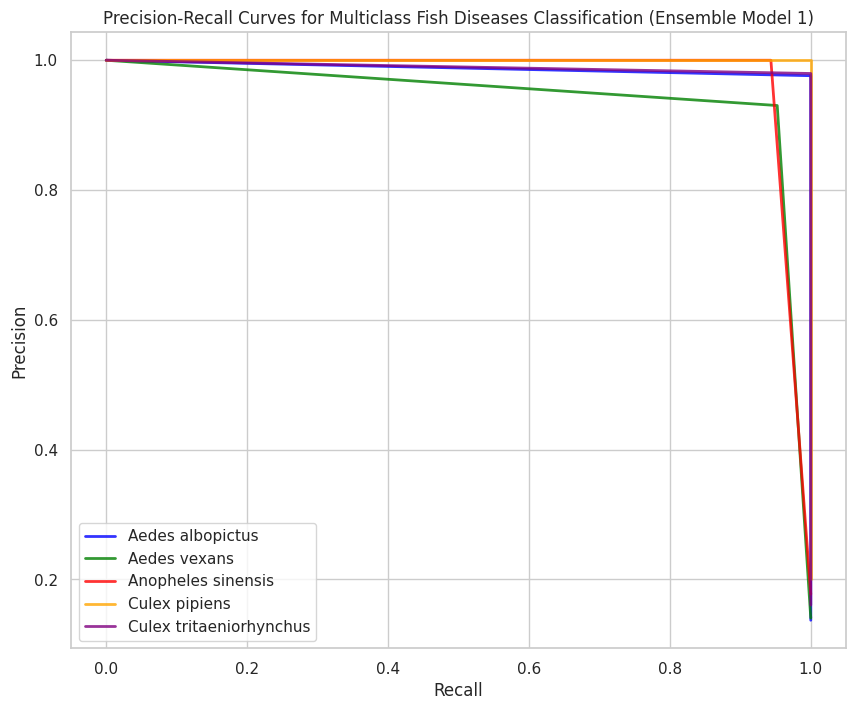

In [ ]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
for i, color in enumerate(colors):
    precision, recall, _ = precision_recall_curve(true_labels_bin[:, i], predicted_labels_bin[:, i])
    plt.plot(recall, precision, label=f'{class_names[i]}', color=colors[i], linestyle='-', linewidth=2, alpha=0.8)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curves for Multiclass Fish Diseases Classification (Ensemble Model 1)')
plt.legend(loc='lower left')
plt.grid(True)
plt.show()



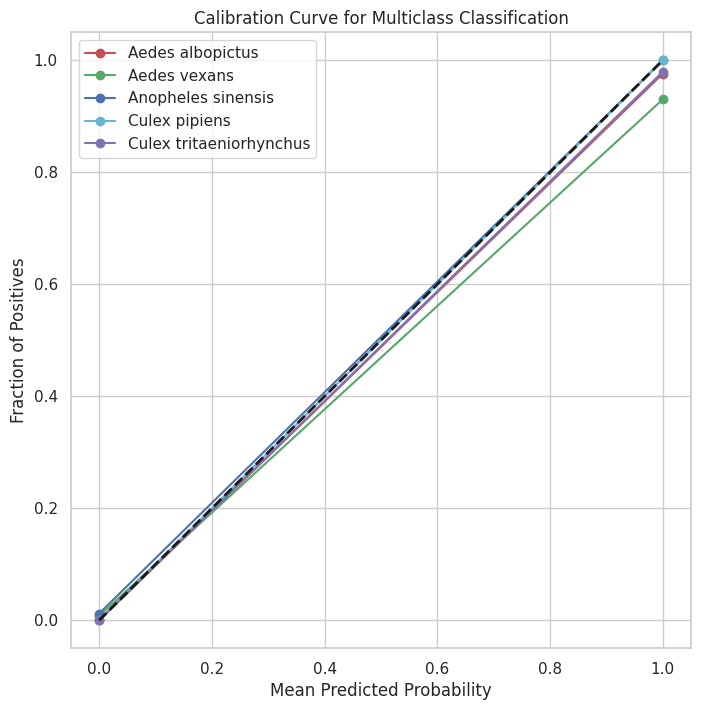

In [ ]:
from sklearn.calibration import calibration_curve
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 8))

colors = ['r', 'g', 'b', 'c', 'm'] # List of colors for lines
for i in range(min(len(class_names), len(colors))):
    prob_true, prob_pred = calibration_curve(true_labels_bin[:, i], predicted_labels_bin[:, i], n_bins=10, strategy='uniform')
    plt.plot(prob_pred, prob_true, marker='o', color=colors[i], label=f'{class_names[i]}')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlabel('Mean Predicted Probability')
plt.ylabel('Fraction of Positives')
plt.title('Calibration Curve for Multiclass Classification')
plt.legend(loc='upper left')
plt.show()



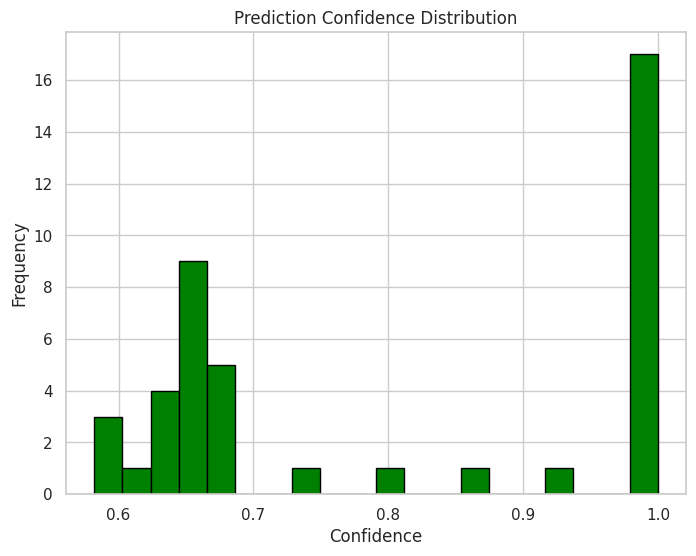

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming predictions is a matrix of predicted probabilities for each class
prediction_confidences = np.max(predictions, axis=1)

# Plot histogram of prediction confidences
plt.figure(figsize=(8, 6))
plt.hist(prediction_confidences, bins=20, edgecolor='black', color='green')
plt.xlabel('Confidence')
plt.ylabel('Frequency')
plt.title('Prediction Confidence Distribution')
plt.show()
